# Project Abtract:

The project focuses on analyzing residential property prices to gain insights into the factors influencing the housing market. By examining various variables such as property characteristics, location, market trends, and economic indicators, this project aims to provide a comprehensive understanding of the factors driving home prices and identify key trends and patterns.

The project utilizes a dataset containing information on residential properties, including features such as square footage, number of bedrooms and bathrooms, location attributes (e.g., neighborhood, proximity to amenities), and corresponding sale prices. By analyzing these variables, the project seeks to uncover correlations and trends that can help stakeholders understand the dynamics of the housing market and make informed decisions regarding real estate investments, pricing strategies, and policy development.

Through exploratory data analysis and statistical modeling techniques, the project aims to identify the key factors influencing home prices. This includes assessing the impact of property characteristics (e.g., size, amenities), location factors (e.g., proximity to schools, transportation), and market trends (e.g., supply and demand, interest rates) on property values. Additionally, the project explores the relationships between economic indicators (e.g., GDP growth, employment rates) and home prices to understand the broader macroeconomic influences on the housing market.

The outcomes of this project have implications for real estate professionals, investors, policymakers, and prospective homeowners. Real estate professionals can utilize the findings to better understand market trends, advise clients, and develop effective pricing strategies. Investors can gain insights into factors that drive property value appreciation and identify lucrative investment opportunities. Policymakers can use the findings to inform housing policies, zoning regulations, and urban planning initiatives. Prospective homeowners can make more informed decisions regarding property purchases, taking into account factors that influence home prices and long-term value appreciation.


# Columns Details

date: This column represents the date associated with the property listing or sale.
    
price: This column denotes the price of the property.
    
bedrooms: This column indicates the number of bedrooms in the property.
    
bathrooms: This column represents the number of bathrooms in the property.
 ->Full bathroom (1.0): Includes a sink, toilet, and a bath/shower.
 ->Half bathroom (0.5): Includes only a sink and a toilet, without a bath or shower.
 ->Three-quarter bathroom (0.75): Includes a sink, toilet, and a shower but no bathtub.
sqft_living: This column denotes the total living area of the property in square feet.
    
sqft_lot: This column represents the total area of the lot or land on which the property is situated, measured in square feet.
    
floors: This column indicates the number of floors in the property.
    
waterfront: This column is a binary indicator (e.g., 0 or 1) that represents whether the property has a waterfront view.
    
view: This column indicates the level of view from the property, which could be a rating or a categorical value.
    
condition: This column represents the overall condition of the property, which could be a rating or a categorical value.
    
sqft_above: This column denotes the square footage of the property that is above ground level.
    
sqft_basement: This column represents the square footage of the property's basement, if applicable.
    
yr_built: This column indicates the year the property was originally built.
    
yr_renovated: This column represents the year the property was last renovated, if applicable.
    
street: This column specifies the street address or location of the property.
    
city: This column indicates the city where the property is located.
    
statezip: This column provides the state and ZIP code of the property.
    
country: This column represents the country where the property is located.

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Loading Dataset**

In [7]:
dataset = pd.read_csv('data.csv')
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
dataset.shape

(4600, 18)

In [10]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Delete date column** Date column is irrelevant

In [12]:
dataset.drop(['date'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Checking how many different Countries are there**

In [14]:
dataset.country.value_counts()

country
USA    4600
Name: count, dtype: int64

Deleting the country column as all the records have the same country, hence irrelevant

In [16]:
dataset.drop(['country'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


Since we already have statezip, we can safely delete street and city.

In [18]:
dataset.drop(['street', 'city'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


**Checking for null values**

In [20]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

*No null values present*

# General corellation analysis

In [23]:
dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip'],
      dtype='object')

In [24]:
cordataset=dataset.drop(["statezip"],axis=1)

<Axes: >

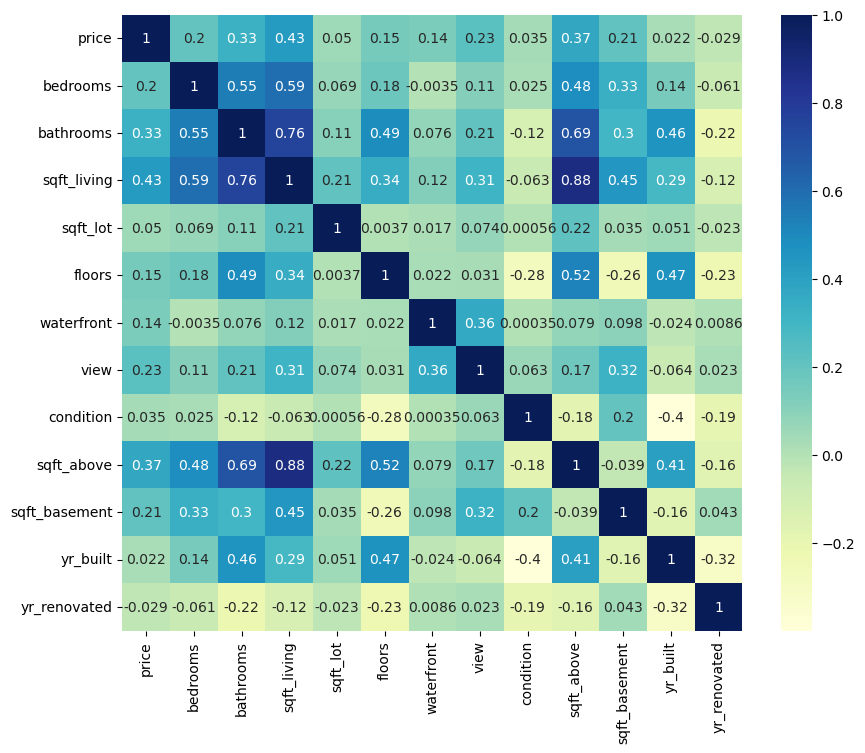

In [25]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = cordataset.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

# Analysis on number of bedroom feature

corellation of price with no. of bedrooms

<Axes: xlabel='bedrooms', ylabel='price'>

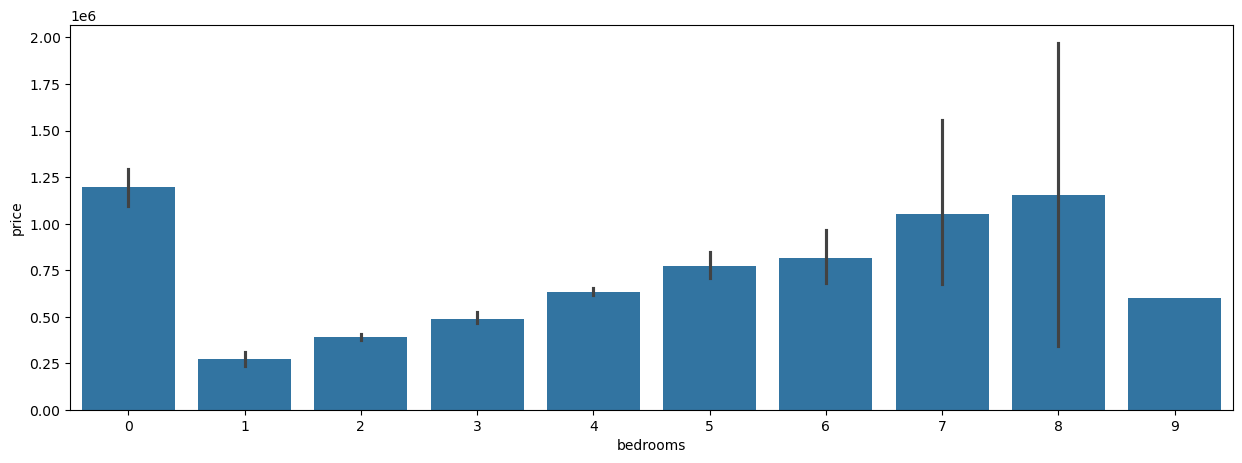

In [28]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

*0 & 9 bedrooms are probably an outlier. Let's dive deeper*

Let's get the count  of respective no. of bedrooms

In [31]:
dataset.groupby('bedrooms').price.agg([len, min, max])

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\3376453444.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])
C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\3376453444.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])


,len,min,max
bedrooms,,,
0,2,1095000.0,1295648.0
1,38,0.0,540000.0
2,566,0.0,1695000.0
3,2032,0.0,26590000.0
4,1531,0.0,4489000.0
5,353,0.0,7062500.0
6,61,0.0,3100000.0
7,14,280000.0,3200000.0
8,2,340000.0,1970000.0


*Hence proved that 0 & 9 are outliers. Let's remove them*

In [33]:
df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)].copy()

In [34]:
df.shape

(4597, 14)

# Analysis on the zipcode feature

Checking for unique zip code

In [37]:
df.statezip.value_counts()

statezip
WA 98103    147
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

*All the zip codes are of Washington. Let's do a correlation analysis of zip codes*

<Axes: xlabel='price', ylabel='statezip'>

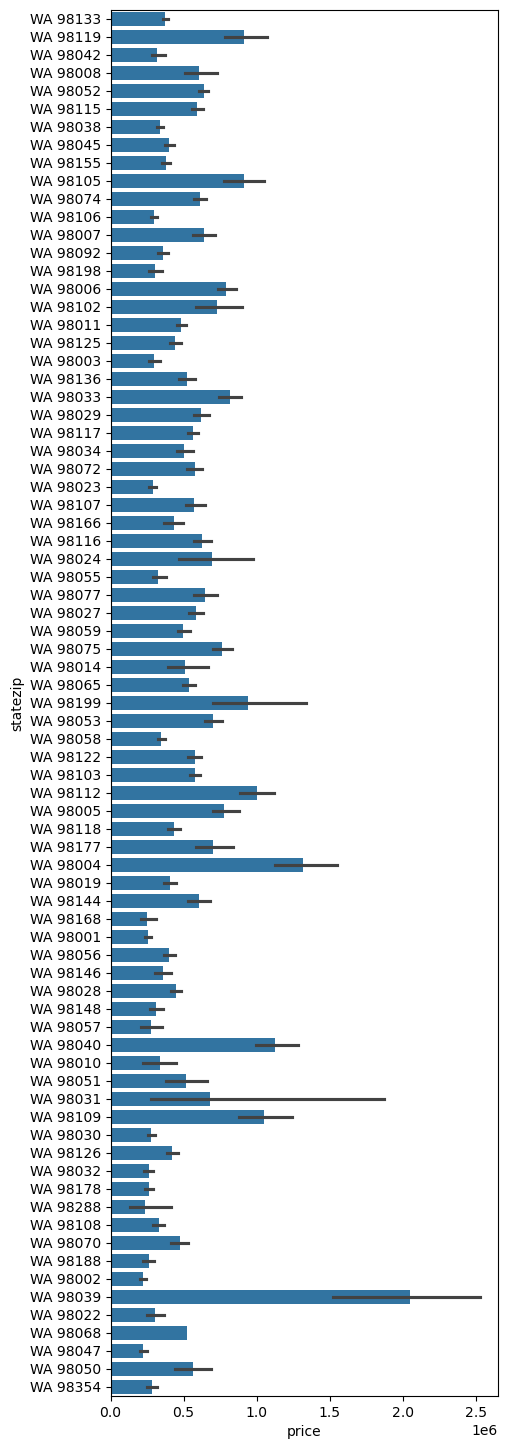

In [39]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = df.price, y = df.statezip)

Let's look at the distribution of price

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\2585100591.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)


<Axes: xlabel='price', ylabel='Density'>

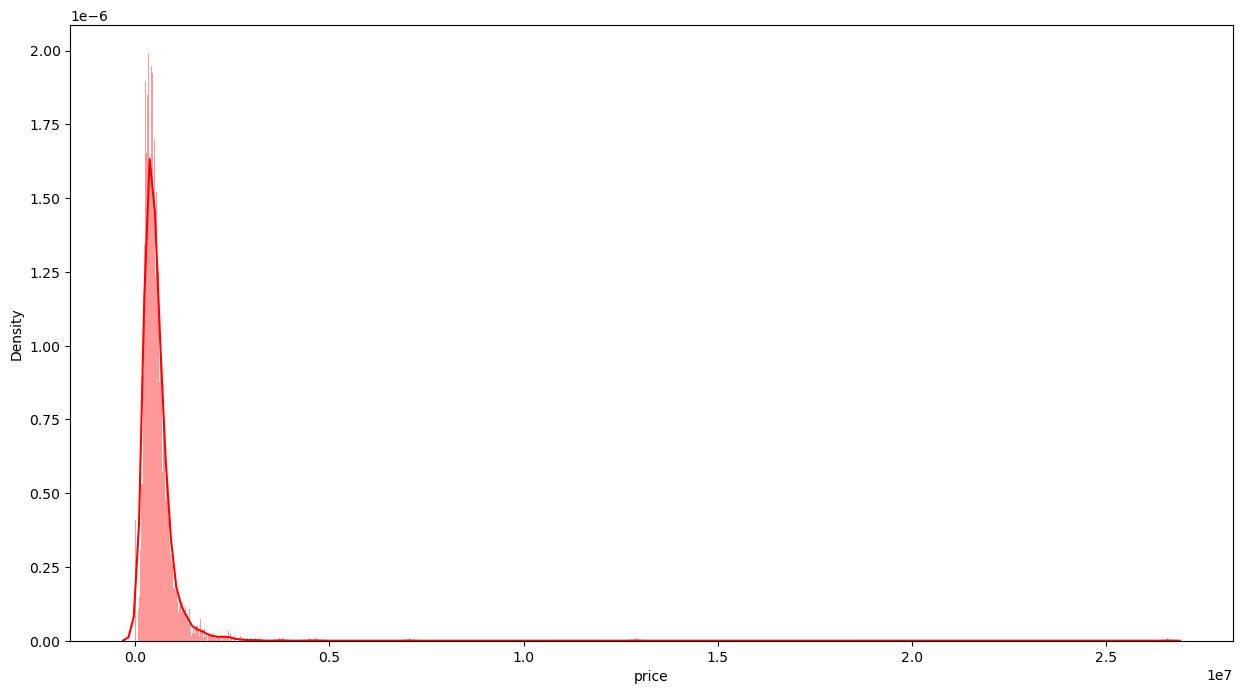

In [41]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)

Groupby on price

In [43]:
df.price.agg([min, max])

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\1315707.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.price.agg([min, max])
C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\1315707.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.price.agg([min, max])


min           0.0
max    26590000.0
Name: price, dtype: float64

**How many instances are there with price = 0?**

In [45]:
len(df[(df.price == 0)])

49

*need to set some price for these records*

# Analysis on bathroom feature w.r.t. price

<Axes: xlabel='bathrooms', ylabel='price'>

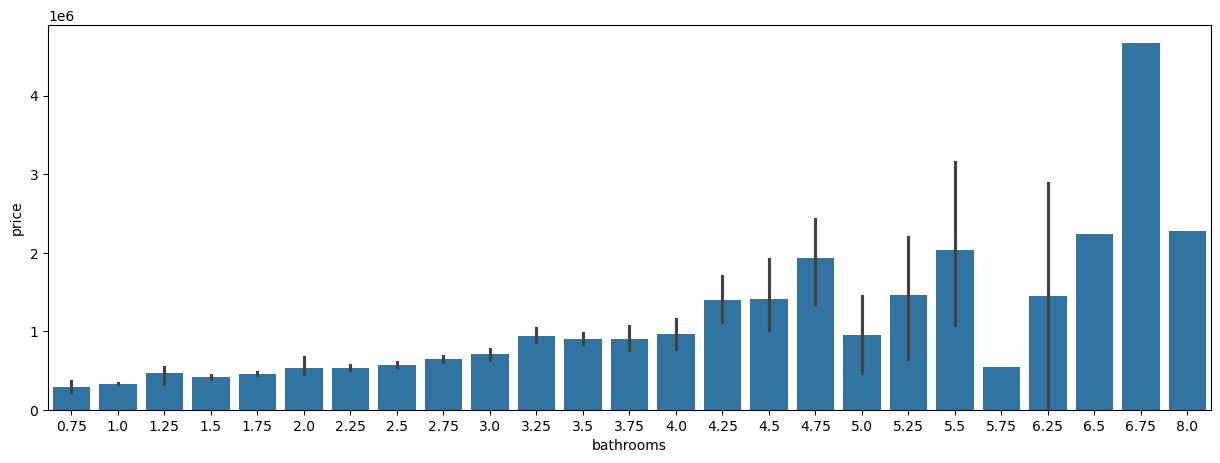

In [48]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

In [49]:
df['statezip'] = df['statezip'].str.replace('WA ', '')
df['statezip'] = pd.to_numeric(df['statezip'])

# Analysis on all the instances whose price is 0

Getting all those instances

In [52]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(49, 14)

In [53]:
zero_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4354,0.0,3,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,98001
4356,0.0,4,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,98199
4357,0.0,6,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,98146
4358,0.0,5,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,98075
4361,0.0,5,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,98166


Let's get the unique value of the most important features

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\2430850287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_price.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

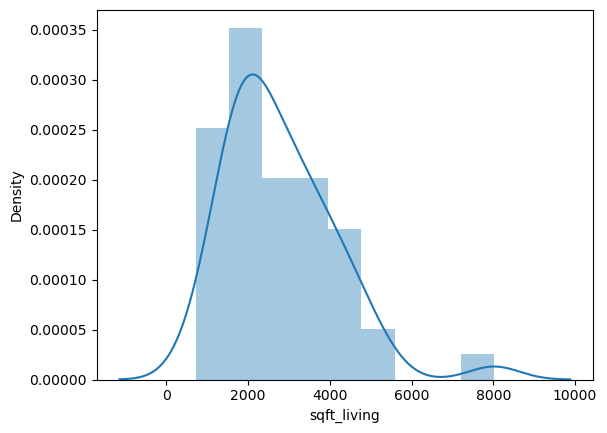

In [55]:
sns.distplot(zero_price.sqft_living)

*Most of the 0 price houses are in the range 1000 - 5000 sqft*

Let's find more correlation between the 0 price houses

In [58]:
zero_price.agg([min, max, 'mean', 'median'])

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\3246869973.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  zero_price.agg([min, max, 'mean', 'median'])
C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\3246869973.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  zero_price.agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,98001.00000
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,98199.00000
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,98077.77551
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,98065.00000


**We are going to use common ranges from the above table to get similar records from the original dataset and non-zero price to set the values of 0 price instances**

In [60]:
sim_from_ori = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)].copy()

In [61]:
sim_from_ori.shape

(79, 14)

In [62]:
sim_from_ori.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
11,1400000.0,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,98105
172,407000.0,4,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,98198
207,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,98001
257,749950.0,4,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,98116
261,581000.0,4,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,98033


Get the average price of these instances

In [64]:
sim_from_ori.price.mean()

735475.037070886

Let's confirm this by comparing with the other house price of the same yr_built and having similar sq_ft

In [66]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

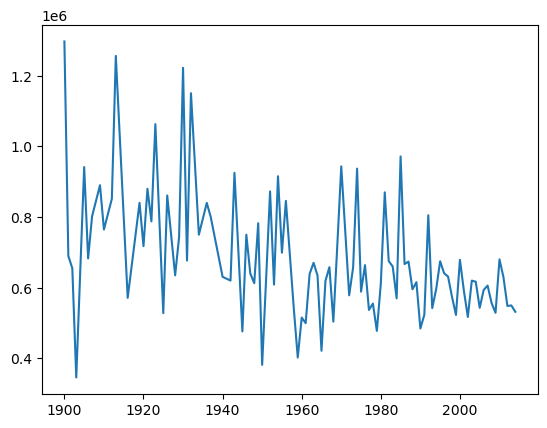

In [67]:
plt.plot(yr_price_avg)

*This confirms our assumption. The avg. pricing of such houses is between 600000 to 800000*

**Replacing all 0 price values with $730000**

In [70]:
df.price.replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df.price == 0)])

C:\Users\Bhargav Bhatt\AppData\Local\Temp\ipykernel_36588\943971067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.price.replace(to_replace = 0, value = 735000, inplace = True)


0

In [71]:
df['bed_bath'] = df['bedrooms'] * df['bathrooms']


In [72]:
df['price'] = np.log(df['price'])


In [73]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,bed_bath
0,12.653958,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133,4.50
1,14.684290,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119,12.50
2,12.742566,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042,6.00
3,12.948010,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008,6.75
4,13.217674,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,98052,10.00


# Feature reduction

Since sqft_living is the most important feature and sqft_living & sqft_above are highly corellated we are going  to remove the sqft_above feature.

In [76]:
df.drop(['sqft_above'], axis = 1, inplace = True)
df.shape

(4597, 14)

# Handling the index order
By removing some rows our original dataset index is changed. Let's fix it

In [78]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4597 non-null   int64  
 1   price          4597 non-null   float64
 2   bedrooms       4597 non-null   int64  
 3   bathrooms      4597 non-null   float64
 4   sqft_living    4597 non-null   int64  
 5   sqft_lot       4597 non-null   int64  
 6   floors         4597 non-null   float64
 7   waterfront     4597 non-null   int64  
 8   view           4597 non-null   int64  
 9   condition      4597 non-null   int64  
 10  sqft_basement  4597 non-null   int64  
 11  yr_built       4597 non-null   int64  
 12  yr_renovated   4597 non-null   int64  
 13  statezip       4597 non-null   int64  
 14  bed_bath       4597 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 538.8 KB


In [79]:
X = df.iloc[:, 1:]
X.drop("price",inplace=True,axis=1)
X.shape

(4597, 13)

In [80]:
y = df.price

Splitting dataset into train and remainder

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [83]:
print(len(X_train) / len(df))

0.8999347400478573


Splitting remainder into validation and test set

In [85]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


Let's print the length of all the 3 splits

In [87]:
print(len(X_train))
print(len(X_val))
print(len(X_val))

4137
230
230


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear regression

In [90]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_val,y_pred)
mse

0.23028280203083112

In [92]:
y_val.head(10)

1073    12.072541
4524    13.764323
4434    12.642673
2572    12.964539
4310    12.834681
4017    13.407542
4241    13.539757
3139    12.959844
2283    12.691580
4200    13.428376
Name: price, dtype: float64

In [93]:
y_pred

array([12.70087799, 13.61054923, 13.12013733, 12.80021536, 12.58306284,
       13.15563375, 12.84914509, 12.68940585, 12.74776556, 13.27908722,
       13.25583161, 12.77872029, 13.17400588, 13.52686847, 12.79847191,
       13.19166203, 12.85181558, 13.59291668, 12.94542061, 13.16810637,
       12.89036784, 13.59743985, 12.60943014, 13.02595269, 14.77833601,
       12.66350079, 13.36908752, 12.91659403, 12.81432777, 12.75799661,
       13.07863718, 13.17309843, 12.81161026, 12.76623011, 12.54633616,
       13.14056191, 12.58728752, 12.61905634, 13.1526112 , 13.6330859 ,
       13.02567865, 13.72961511, 12.90361123, 13.09280225, 13.57303059,
       12.97263937, 12.46086328, 13.17421231, 13.09774484, 12.54887188,
       13.05415387, 12.95095212, 13.38851504, 12.83703388, 13.09718339,
       13.1476293 , 12.80156818, 12.90061937, 12.95982828, 13.18313358,
       13.43840593, 12.68200771, 12.84404779, 12.87418624, 12.78787088,
       12.51778755, 13.72264426, 13.10430326, 13.16313262, 13.06

In [94]:
X_test.columns = X_test.columns.astype(str)
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred_test)
mse

0.12311986503877999

In [95]:
lin_reg.score(X_test, y_test)

0.5288025289158165

In [96]:
y_test

3454    13.017003
3857    12.611538
1818    12.069680
856     12.278393
1001    12.971540
          ...    
3760    12.879017
2596    13.384728
1839    12.699243
1835    12.676076
787     12.666657
Name: price, Length: 230, dtype: float64

In [97]:
y_pred_test

array([12.77978163, 12.55254484, 12.8746518 , 13.05071138, 12.98759338,
       13.32253812, 12.38526916, 13.01003561, 12.94632262, 13.05951419,
       13.03912805, 12.76483013, 13.1677922 , 12.74203627, 13.65176597,
       13.32221938, 12.44952819, 12.78452266, 13.50557436, 12.63354285,
       13.43116851, 12.96944196, 12.93277771, 12.86525503, 12.8275214 ,
       12.92410388, 12.82071874, 12.97677287, 13.68566457, 13.27773924,
       12.75611922, 12.89122313, 13.07013749, 13.50770414, 12.51987926,
       12.88669349, 12.83367109, 13.02077751, 13.70545213, 12.65719597,
       12.70241272, 12.94246724, 12.8799016 , 13.13349273, 12.65789964,
       13.12650844, 13.0542606 , 12.66747669, 13.09809346, 12.81517869,
       12.86658032, 12.89345954, 13.31682501, 12.53859947, 13.1870089 ,
       13.0443247 , 13.02245812, 12.90464106, 14.4982649 , 13.24664591,
       13.05919112, 13.24907334, 12.65402579, 12.66136984, 13.39991889,
       12.60427002, 12.93098071, 13.44799563, 12.99100882, 13.25

# Actual vs. Pridicted Prices

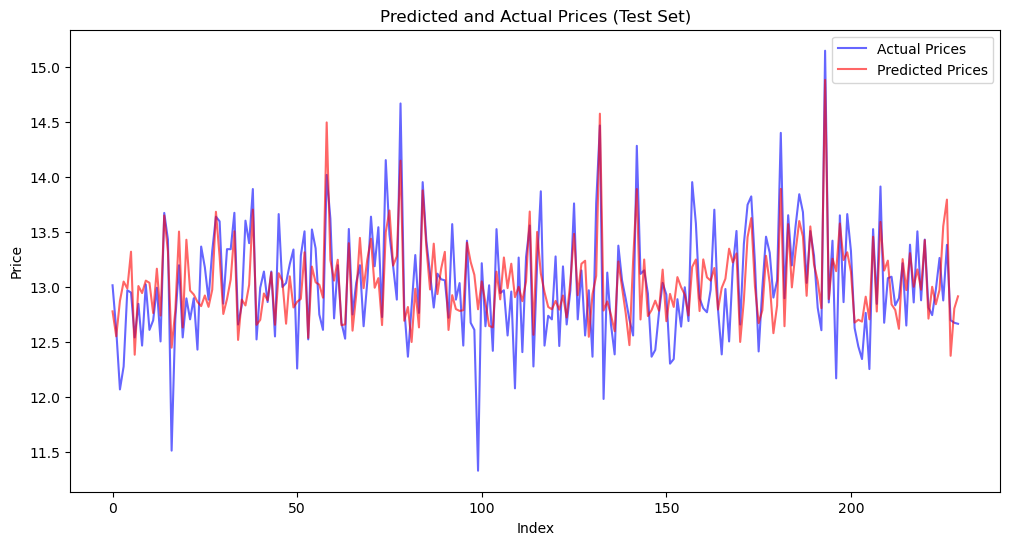

In [99]:
# Plotting predicted and actual prices over the index for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual Prices', color='b', alpha=0.6)
plt.plot(y_pred_test, label='Predicted Prices', color='r', alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Predicted and Actual Prices (Test Set)')
plt.legend()
plt.show()

# Exporting The Model

In [101]:
import pickle
with open('modelcopy.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_test,y_pred_test)

0.5288025289158165

In [104]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)


MSE: 0.06495246006057154
R²: 0.7514175725290333
